In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
tran_data = pd.read_csv('Transactions_new.csv')

In [35]:
cust_data = pd.read_csv('Customers_new.csv')

In [9]:
prod_data = pd.read_csv('prod_cat_info.csv')

In [10]:
#check the head and shape of the data 


In [12]:
tran_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [36]:
cust_data.head()

,customer_Id,DOB,Gender,city_code,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,268408,01-02-1970,M,4.0,NaN,NaN,NaN
1,269696,01-07-1970,F,8.0,NaN,NaN,NaN
2,268159,01-08-1970,F,8.0,NaN,NaN,NaN
3,270181,01-10-1970,F,2.0,NaN,NaN,NaN
4,268073,01-11-1970,M,1.0,NaN,NaN,NaN


In [15]:
prod_data.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [16]:
#To find the shape
tran_data.shape

(23053, 10)

In [17]:
cust_data.shape

(5647, 7)

In [19]:
prod_data.shape

(23, 4)

In [38]:
#To drop the columns with N
cust_data.dropna(axis=1,how='all',inplace=True)

In [41]:
cust_data.head()

,customer_Id,DOB,Gender,city_code
0,268408,01-02-1970,M,4.0
1,269696,01-07-1970,F,8.0
2,268159,01-08-1970,F,8.0
3,270181,01-10-1970,F,2.0
4,268073,01-11-1970,M,1.0


In [42]:
cust_data.shape

(5647, 4)

In [43]:
cust_data.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [44]:
#Before merging checking the duplicacy
tran_data.duplicated().sum()

13

In [45]:
cust_data.duplicated().sum()

0

In [46]:
prod_data.duplicated().sum()

0

In [47]:
tran_data.drop_duplicates(inplace=True)

In [48]:
#checking duplicacy after dropping duplicates
tran_data.duplicated().sum()

0

In [55]:
#checking the info of all the data
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23040 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23040 non-null  int64  
 1   cust_id           23040 non-null  int64  
 2   tran_date         23040 non-null  object 
 3   prod_subcat_code  23040 non-null  int64  
 4   prod_cat_code     23040 non-null  int64  
 5   Qty               23040 non-null  int64  
 6   Rate              23040 non-null  int64  
 7   Tax               23040 non-null  float64
 8   total_amt         23040 non-null  float64
 9   Store_type        23040 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [56]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [57]:
cust_data.head()

,customer_Id,DOB,Gender,city_code
0,268408,01-02-1970,M,4.0
1,269696,01-07-1970,F,8.0
2,268159,01-08-1970,F,8.0
3,270181,01-10-1970,F,2.0
4,268073,01-11-1970,M,1.0


In [58]:
#convert DOB to datetime datatype
cust_data['DOB']=pd.to_datetime(cust_data['DOB'],format='%d-%m-%Y')

In [59]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [60]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


In [61]:
prod_data.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [62]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23040 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23040 non-null  int64  
 1   cust_id           23040 non-null  int64  
 2   tran_date         23040 non-null  object 
 3   prod_subcat_code  23040 non-null  int64  
 4   prod_cat_code     23040 non-null  int64  
 5   Qty               23040 non-null  int64  
 6   Rate              23040 non-null  int64  
 7   Tax               23040 non-null  float64
 8   total_amt         23040 non-null  float64
 9   Store_type        23040 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [63]:
tran_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [65]:
tran_data['tran_date']=pd.to_datetime(tran_data['tran_date'],format='%d-%m-%Y')

In [67]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23040 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.9+ MB


In [68]:
#Missing value detection and treatment processes
cust_data.isnull()


,customer_Id,DOB,Gender,city_code
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5642,False,False,False,False
5643,False,False,False,False
5644,False,False,False,False
5645,False,False,False,False


In [69]:
cust_data.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [70]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [73]:
cust_data=cust_data.dropna(axis=0,how='any')

In [74]:
cust_data.isnull().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

In [75]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5643 non-null   int64         
 1   DOB          5643 non-null   datetime64[ns]
 2   Gender       5643 non-null   object        
 3   city_code    5643 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 220.4+ KB


In [76]:
tran_data.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [77]:
prod_data.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [78]:
tran_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [79]:
cust_data.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-02-01,M,4.0
1,269696,1970-07-01,F,8.0
2,268159,1970-08-01,F,8.0
3,270181,1970-10-01,F,2.0
4,268073,1970-11-01,M,1.0


In [80]:
#merging the data
tran_cust=pd.merge(tran_data,cust_data,how='inner',left_on='cust_id',right_on='customer_Id')

In [81]:
tran_cust.shape

(23023, 14)

In [82]:
tran_cust.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0


In [83]:
tran_cust.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
customer_Id         0
DOB                 0
Gender              0
city_code           0
dtype: int64

In [84]:
tran_cust.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [85]:
prod_data.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [88]:
retail_data=pd.merge(tran_cust,prod_data,how='inner',left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])

In [89]:
retail_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-08-06,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY


In [91]:
retail_data.shape

(23023, 17)

In [93]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23023 entries, 0 to 23022
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23023 non-null  int64         
 1   cust_id            23023 non-null  int64         
 2   tran_date          23023 non-null  datetime64[ns]
 3   prod_subcat_code   23023 non-null  int64         
 4   prod_cat_code      23023 non-null  int64         
 5   Qty                23023 non-null  int64         
 6   Rate               23023 non-null  int64         
 7   Tax                23023 non-null  float64       
 8   total_amt          23023 non-null  float64       
 9   Store_type         23023 non-null  object        
 10  customer_Id        23023 non-null  int64         
 11  DOB                23023 non-null  datetime64[ns]
 12  Gender             23023 non-null  object        
 13  city_code          23023 non-null  float64       
 14  prod_c

In [94]:
retail_data.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               0
city_code            0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [95]:
retail_data.duplicated().sum()

0

In [96]:
#Multivariate Analysis on categorical column
cat_data=retail_data.select_dtypes('object')

In [97]:
cat_data.head()

,Store_type,Gender,prod_cat,prod_subcat
0,e-Shop,M,Clothing,Women
1,e-Shop,F,Electronics,Computers
2,TeleShop,M,Books,DIY
3,e-Shop,M,Home and kitchen,Bath
4,TeleShop,M,Books,DIY


In [98]:
#checking the composition of the categorical variable using visualization and also check the 
cat_data.Gender.nunique()

2

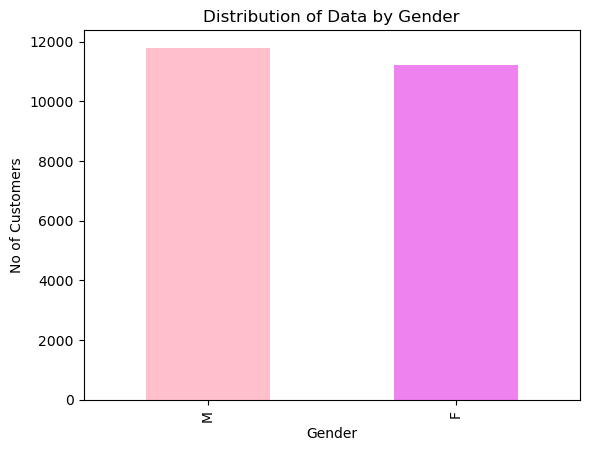

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [101]:
cat_data.Gender.value_counts().plot(kind='bar',color=['pink','violet'])
plt.title('Distribution of Data by Gender')
plt.xlabel('Gender')
plt.ylabel('No of Customers')
plt.show()
plt.figure(figsize=(10,8))

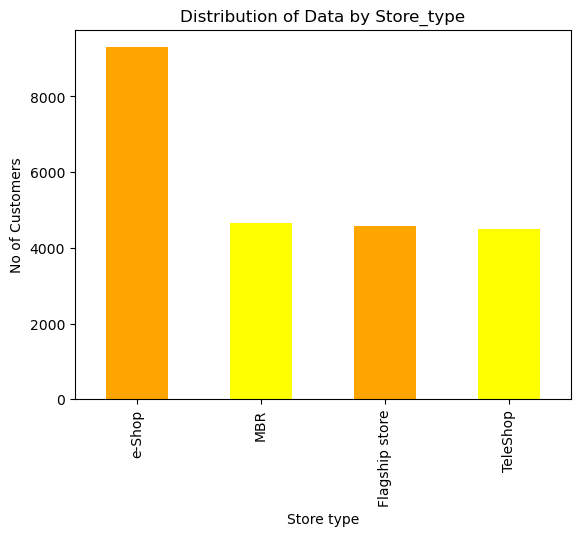

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [105]:
cat_data.Store_type.value_counts().plot(kind='bar',color=['Orange','Yellow'])
plt.title('Distribution of Data by Store_type')
plt.xlabel('Store type')
plt.ylabel('No of Customers')
plt.show()
plt.figure(figsize=(10,8))

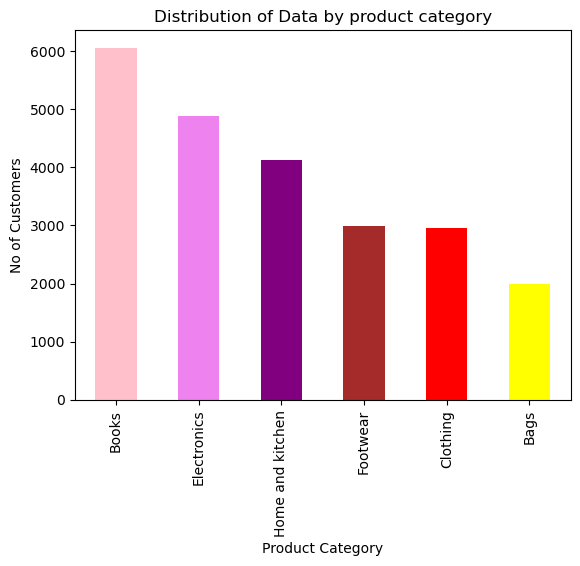

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [109]:
cat_data.prod_cat.value_counts().plot(kind='bar',color=['pink','violet','purple','brown','red','yellow'])
plt.title('Distribution of Data by product category')
plt.xlabel('Product Category')
plt.ylabel('No of Customers')
plt.show()
plt.figure(figsize=(10,8))

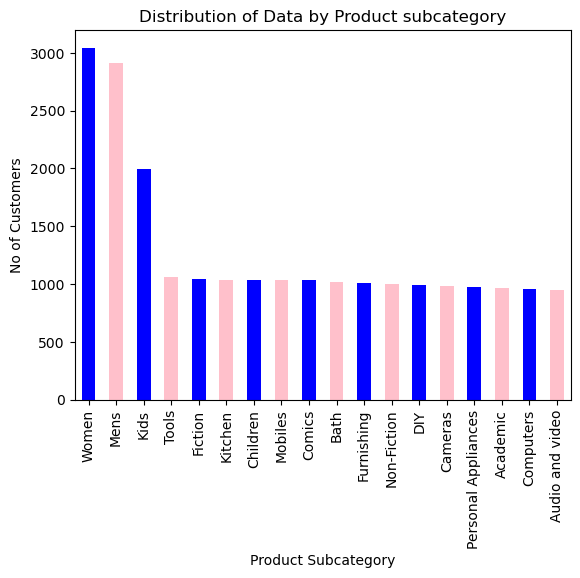

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [111]:
cat_data.prod_subcat.value_counts().plot(kind='bar',color=['blue','pink'])
plt.title('Distribution of Data by Product subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('No of Customers')
plt.show()
plt.figure(figsize=(10,8))